# <font  color = "#0093AF"> T$_1$ and NOE

In [2]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl
import matplotlib.pyplot as plt
import numpy as np
from time import time
from copy import copy

In [3]:
%matplotlib notebook

In [4]:
ex0=sl.ExpSys(v0H=600,Nucs='13C',vr=0,LF=True,pwdavg=sl.PowderAvg()[15])
ex0.set_inter('CSA',i=0,delta=200)
ex1=ex0.copy()
ex1.set_inter('CSA',i=0,delta=200,euler=[0,45*np.pi/180,0])

L=sl.Liouvillian(ex0,ex1)
L.kex=sl.Tools.twoSite_kex(1e-10)

seq=L.Sequence(Dt=1e-2)

rho=sl.Rho('Thermal','13Cz')

rho.DetProp(seq,n=1000)

Density Matrix/Detection Operator
rho0: Thermal
detect[0]: 13Cz
Current time is 10000000.000 microseconds
1000 time points have been recorded


<IPython.core.display.Javascript object>


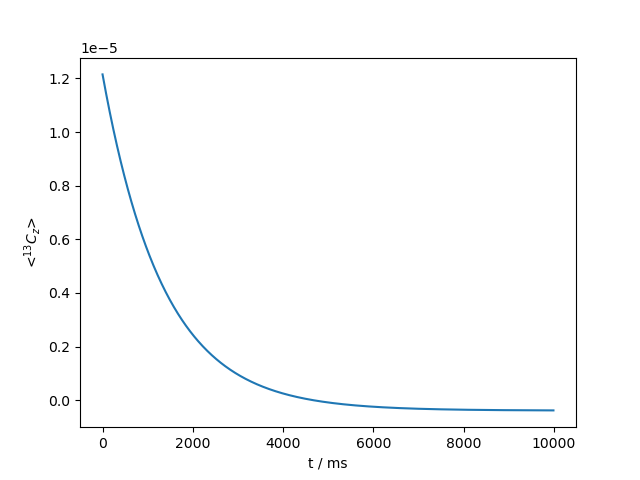

<AxesSubplot:xlabel='t / ms', ylabel='<$^{13}C_z$>'>

In [5]:
rho.plot()

In [6]:
ex0=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=0,LF=True,pwdavg=sl.PowderAvg()[0])
ex0.set_inter('dipole',i0=0,i1=1,delta=sl.Tools.dipole_coupling(.209,'1H','13C'))
ex1=ex0.copy()
ex1.set_inter('dipole',i0=0,i1=1,delta=sl.Tools.dipole_coupling(.209,'1H','13C'),euler=[0,45*np.pi/180,0])

L=sl.Liouvillian(ex0,ex1)
L.kex=sl.Tools.twoSite_kex(1e-10)

L.add_relax('DynamicThermal')

seq=L.Sequence(Dt=1e-2)

rho=sl.Rho('Thermal',['1Hz','13Cz'])

rho.DetProp(seq,n=500000)

Density Matrix/Detection Operator
rho0: Thermal
detect[0]: 1Hz
detect[1]: 13Cz
Current time is 5000000000.000 microseconds
500000 time points have been recorded


<IPython.core.display.Javascript object>


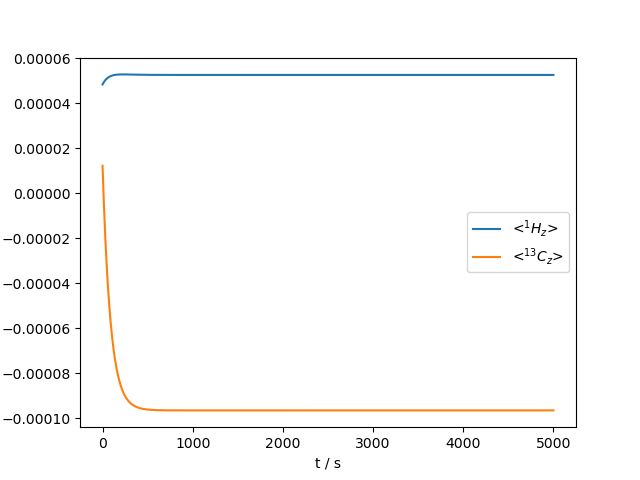

<AxesSubplot:xlabel='t / s', ylabel='<Op>'>

In [7]:
rho.plot(axis='s')

In [8]:
L[0].L(step=0)@L[0].rho_eq(step=0)

array([-5.52863579e-08-1.03397577e-25j,  1.73017156e-11+3.99182909e-11j,
        1.73103754e-11+3.99084585e-11j, -2.52426968e-11-3.47590845e-11j,
        1.73088210e-11-3.99182909e-11j,  4.30505240e-08+5.29395592e-23j,
        4.27889807e-11+0.00000000e+00j, -1.73076345e-11-3.99209485e-11j,
        1.73101047e-11-3.99077299e-11j,  4.27889876e-11-2.27373675e-13j,
       -2.21453118e-07-1.05879118e-22j, -1.73159265e-11-3.99253963e-11j,
       -2.52426968e-11+3.47593065e-11j, -1.73082659e-11+3.99212330e-11j,
       -1.72946102e-11+3.99253963e-11j,  3.19024196e-09-2.06795153e-25j,
        5.52863579e-08-5.29395592e-23j, -1.72803993e-11-3.99609235e-11j,
       -1.74224489e-11-3.98496375e-11j,  2.52384780e-11+3.47881723e-11j,
       -1.72803993e-11+3.99040800e-11j, -4.30505240e-08+0.00000000e+00j,
       -4.27889529e-11-5.68434189e-14j,  1.72446293e-11+3.99587100e-11j,
       -1.73962476e-11+3.98642647e-11j, -4.27890223e-11+0.00000000e+00j,
        2.21453118e-07-2.64697796e-23j,  1.72803993

In [10]:
U=L.Sequence(Dt=1e-3).U()

In [11]:
a,b=np.linalg.eig(U[0])

In [15]:
b[:,14]/L.rho_eq(step=0)

array([  2.82824145+4.05075103e-12j,   0.34490361-7.24115874e+00j,
        -7.35951826-1.60521218e+02j, 242.84484131-1.75620346e+02j,
         0.34487406+7.24114162e+00j,   2.8283366 -2.84813664e-12j,
         6.39854421-5.30079239e-01j,   1.51370881-2.07158978e+01j,
        -7.35957321+1.60521078e+02j,   6.39854296+5.30080510e-01j,
         2.82873067-2.38184104e-38j,  11.46708617+2.51856277e+01j,
       242.8478832 +1.75624016e+02j,   1.51372275+2.07158488e+01j,
        11.46710435-2.51855347e+01j,   2.82839973-2.99606908e-12j,
         2.82824145+4.05087260e-12j,   2.28750054-1.36564594e-01j,
        -7.20813418-3.27831321e-01j,   2.05594667-2.52863006e-01j,
         2.28750052+1.36566661e-01j,   2.8283366 -2.84821775e-12j,
        15.6280337 +2.07423972e+00j,   1.53317388-4.23065754e-02j,
        -7.20813232+3.27832494e-01j,  15.62801471-2.07423660e+00j,
         2.82873067+6.16459918e-18j,   4.70979768+4.74875690e-01j,
         2.05594523+2.52863689e-01j,   1.53317381+4.23035165e-